In [2]:
#Importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [3]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Early prediction of Diabetes
The project aims to identify if a person has Diabetes or not based on features like gender, age, hypertension, presence of heart disease and smoking history. This is a binary classification problem. Various classification algorithms were used to build models and their performances were compared to find the optimal model

# Link to the dataset : https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [4]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Data Preprocessing and Data Visualization

In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
df.shape

(100000, 9)

In [6]:
# No. of duplicate rows in the dataset
df.duplicated().sum()

3854

In [7]:
df = df.drop_duplicates()
print(f"No. of Duplcate rows after deleting duplicate rows: {df.duplicated().sum()}")

No. of Duplcate rows after deleting duplicate rows: 0


In [8]:
df['diabetes'].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

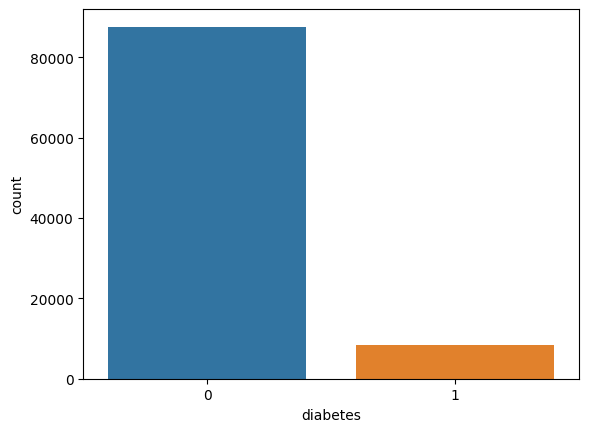

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['diabetes'],data=df)
plt.show()

#### The dataset is highly imbalanced.

We explore 2 methods of imbalance datasets which are **undersampling** and **oversampling**. But we would perform data preprocessing first.

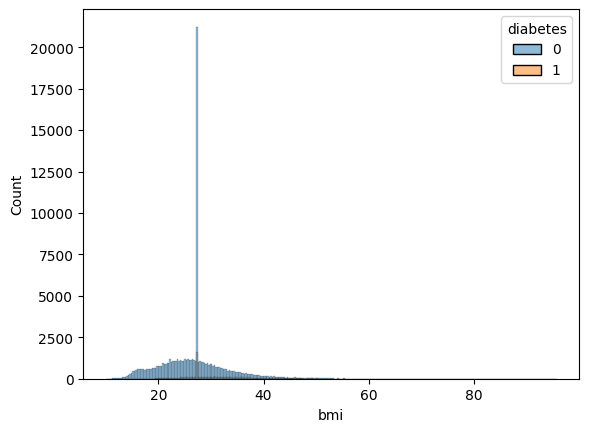

In [10]:
sns.histplot(data=df,x='bmi',hue='diabetes')
plt.show()

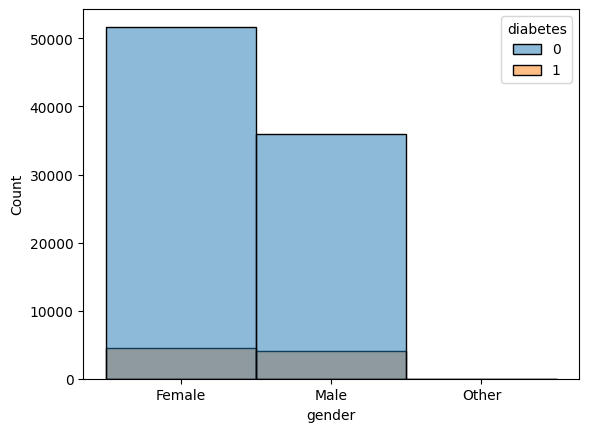

In [11]:
sns.histplot(data=df,x='gender',hue='diabetes')
plt.show()

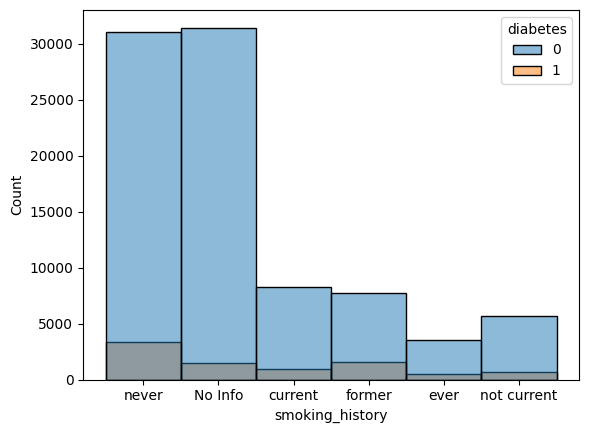

In [12]:
sns.histplot(data=df,x='smoking_history',hue='diabetes')
plt.show()

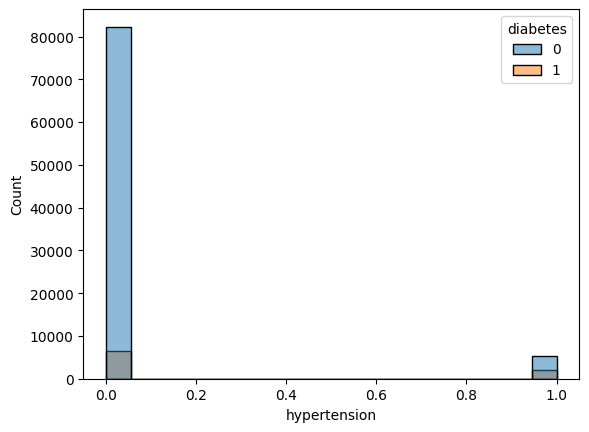

In [13]:
sns.histplot(data=df,x='hypertension',hue='diabetes')
plt.show()

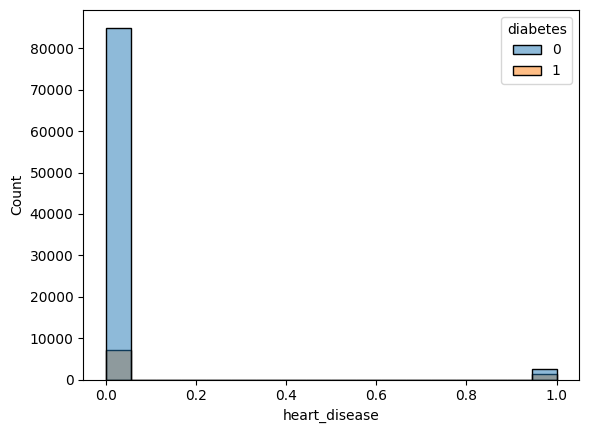

In [14]:
sns.histplot(data=df,x='heart_disease',hue='diabetes')
plt.show()

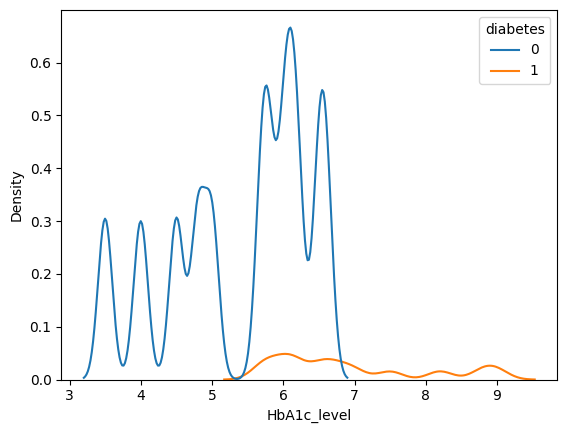

In [15]:
sns.kdeplot(data=df,x='HbA1c_level',hue='diabetes')
plt.show()

In [16]:
df['HbA1c_level'].value_counts()

HbA1c_level
6.6    8164
5.7    8124
6.5    8051
5.8    7992
6.0    7988
6.2    7958
6.1    7716
3.5    7319
4.8    7296
4.5    7290
4.0    7205
5.0    7155
8.8     660
8.2     659
9.0     652
7.5     642
6.8     642
7.0     633
Name: count, dtype: int64

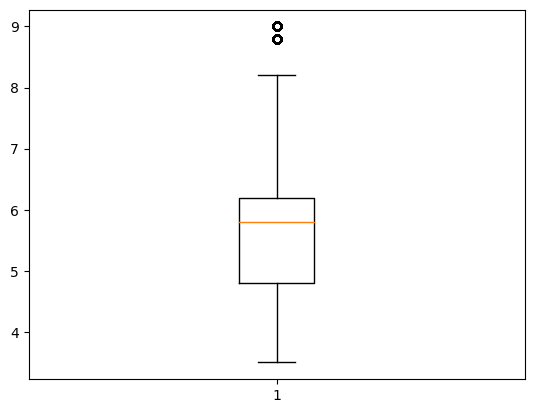

In [17]:
plt.boxplot(df['HbA1c_level'])
plt.show()

In [18]:
mean = df['HbA1c_level'].mean()
std  = df['HbA1c_level'].std()
 
# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2
 
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
 
# Drop the outliers
df = df[(df['HbA1c_level'] >= lower_bound) 
                & (df['HbA1c_level'] <= upper_bound)]

Lower Bound : 3.386144689584599
Upper Bound : 7.679072792161911


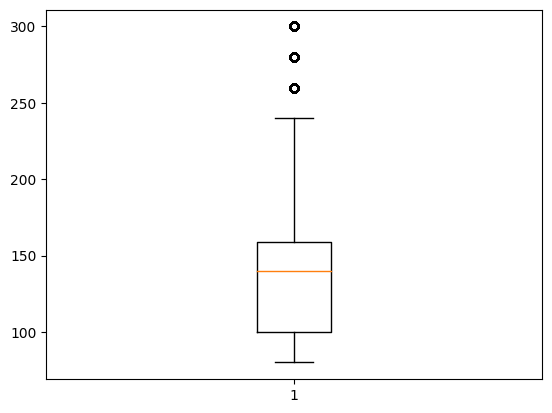

In [19]:
plt.boxplot(df['blood_glucose_level'])
plt.show()

In [20]:
mean = df['blood_glucose_level'].mean()
std  = df['blood_glucose_level'].std()
 
# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2
 
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
 
# Drop the outliers
df = df[(df['blood_glucose_level'] >= lower_bound) 
                & (df['blood_glucose_level'] <= upper_bound)]

Lower Bound : 57.75997192007591
Upper Bound : 216.387646874721


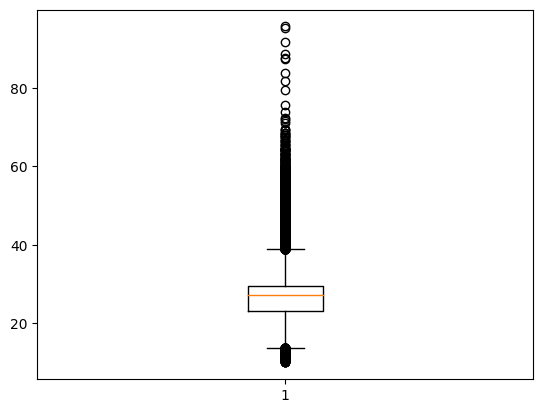

In [21]:
plt.boxplot(df['bmi'])
plt.show()

In [22]:
mean = df['bmi'].mean()
std  = df['bmi'].std()
 
# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2
 
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
 
# Drop the outliers
df = df[(df['bmi'] >= lower_bound) 
                & (df['bmi'] <= upper_bound)]

Lower Bound : 13.798492436940267
Upper Bound : 40.39374091384964


In [23]:
df['diabetes'].value_counts()

diabetes
0    84032
1     3427
Name: count, dtype: int64

#### Let's deal with categorical values


In [24]:
df['smoking_history'].value_counts()

smoking_history
never          30976
No Info        30966
current         8277
former          7971
not current     5703
ever            3566
Name: count, dtype: int64

The people with no info on smoking history are of no use for us in training so we will drop those rows which have **smoking_history** = **'No Info'**.

In [25]:
df = df[df['smoking_history']!='No Info']

In [26]:
df['smoking_history'].value_counts()

smoking_history
never          30976
current         8277
former          7971
not current     5703
ever            3566
Name: count, dtype: int64

In [27]:
df['age'].unique()

array([80.  , 28.  , 36.  , 76.  , 20.  , 44.  , 42.  , 32.  , 53.  ,
       78.  , 67.  , 15.  , 37.  , 40.  , 69.  , 72.  , 30.  , 45.  ,
       43.  , 41.  , 26.  , 77.  , 29.  , 60.  , 38.  , 57.  , 19.  ,
       21.  , 59.  , 27.  , 56.  , 34.  , 54.  , 79.  , 74.  , 55.  ,
       62.  , 47.  , 66.  , 68.  ,  5.  , 75.  , 22.  , 58.  , 24.  ,
       18.  , 16.  , 46.  , 31.  , 49.  , 25.  , 39.  , 65.  , 14.  ,
       70.  , 48.  , 11.  , 51.  , 17.  ,  9.  , 64.  , 63.  , 52.  ,
       50.  , 35.  , 61.  ,  2.  , 33.  , 71.  ,  4.  ,  6.  ,  3.  ,
       23.  , 10.  , 13.  , 73.  ,  1.24,  1.88, 12.  ,  7.  ,  8.  ,
        1.4 ,  1.16,  1.72,  0.24,  1.64,  1.32,  0.32,  0.48,  1.8 ,
        0.88,  0.56,  1.08,  1.  ,  0.8 ,  1.48,  1.56,  0.72,  0.4 ,
        0.64,  0.16])

Generally, the **age** feature is not considered as factor in predicting diabetes but now-a-days even  new born babies are diagnosed with diabetes too because of genes. In the data some of the age values are in decimals which is not good for the training purpose plus we will also check for smoking_history of patient whose age is less than 5 years. If there is smoking history for patients with age less than 5 will not be considered and removed.
[The article for diabetes in new born babies.](https://doi.org/10.1016%2Fj.clp.2017.10.006)

In [28]:
df['age'] = df['age'].astype(int)

In [29]:
df['age'].unique()

array([80, 28, 36, 76, 20, 44, 42, 32, 53, 78, 67, 15, 37, 40, 69, 72, 30,
       45, 43, 41, 26, 77, 29, 60, 38, 57, 19, 21, 59, 27, 56, 34, 54, 79,
       74, 55, 62, 47, 66, 68,  5, 75, 22, 58, 24, 18, 16, 46, 31, 49, 25,
       39, 65, 14, 70, 48, 11, 51, 17,  9, 64, 63, 52, 50, 35, 61,  2, 33,
       71,  4,  6,  3, 23, 10, 13, 73,  1, 12,  7,  8,  0])

Removing the data points with age = 0.

In [30]:
df = df[df['age']!=0]

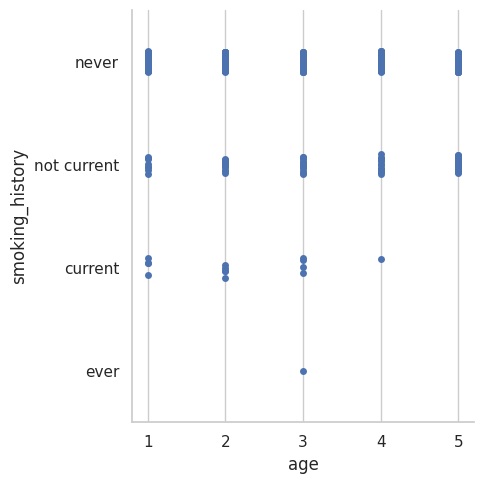

In [31]:
sns.set(style="whitegrid")
sns.catplot(x="age", y="smoking_history", data=df.loc[df['age'] <=5])
plt.show()

We can see some datapoints are showing patients with age less than equal to 5 having smoking history to current or ever which doesn't make sense at all and need to be removed. 

In [32]:
df = df[~((df['age'] < 5) & df['smoking_history'].isin(['ever', 'current']))]

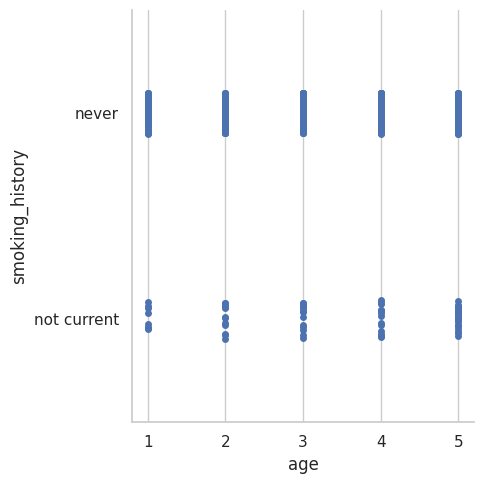

In [33]:
sns.set(style="whitegrid")
sns.catplot(x="age", y="smoking_history", data=df.loc[df['age'] <=5])
plt.show()

The gender feature is also not considered in the role of predicting the diabetes which is explained in a detailed manner in the below link. In short both the gender have different levels of harmones secretion like insulin which makes women more sensitive to having diabetes as compared to men.
[The paper on how gender plays a vital role in predicting diabetes.](https://doi.org/10.3390%2Fijms23168850)

In [34]:
df['gender'].value_counts()

gender
Female    34018
Male      22402
Other        12
Name: count, dtype: int64

#### We will drop 'Other' of gender.

In [35]:
df = df[df['gender'] != 'Other']

In [36]:
df['gender'].value_counts()

gender
Female    34018
Male      22402
Name: count, dtype: int64

In [37]:
df = pd.get_dummies(data=df, drop_first=True)
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80,0,1,25.19,6.6,140,0,False,False,False,True,False
2,28,0,0,27.32,5.7,158,0,True,False,False,True,False
3,36,0,0,23.45,5.0,155,0,False,False,False,False,False
4,76,1,1,20.14,4.8,155,0,True,False,False,False,False
5,20,0,0,27.32,6.6,85,0,False,False,False,True,False


In [38]:
change_col =  ['gender_Male','smoking_history_ever','smoking_history_former','smoking_history_never','smoking_history_not current']
for col in change_col:
    df[col] = df[col].replace(False, 0)
    df[col] = df[col].replace(True, 1)
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80,0,1,25.19,6.6,140,0,0,0,0,1,0
2,28,0,0,27.32,5.7,158,0,1,0,0,1,0
3,36,0,0,23.45,5.0,155,0,0,0,0,0,0
4,76,1,1,20.14,4.8,155,0,1,0,0,0,0
5,20,0,0,27.32,6.6,85,0,0,0,0,1,0


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
columns_to_scale = ['age', 'bmi','HbA1c_level','blood_glucose_level']
scaler.fit(df[columns_to_scale])
scaled_columns = scaler.transform(df[columns_to_scale])
df[columns_to_scale] = scaled_columns

In [40]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.000000,0,1,0.428357,0.775,0.500000,0,0,0,0,1,0
2,0.341772,0,0,0.508462,0.550,0.650000,0,1,0,0,1,0
3,0.443038,0,0,0.362918,0.375,0.625000,0,0,0,0,0,0
4,0.949367,1,1,0.238436,0.325,0.625000,0,1,0,0,0,0
5,0.240506,0,0,0.508462,0.775,0.041667,0,0,0,0,1,0


Now the data is preprocessed, now it's time to test the model with 2 types of dataset:
1. Undersampling
2. Oversampling

In [41]:
x = df.drop(['diabetes'], axis = 1)
y = df['diabetes']

# Undersampling

In [42]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
x_undersample, y_undersample = undersampler.fit_resample(x, y)

df_ux = pd.DataFrame(x_undersample, columns=x.columns)
df_uy = pd.Series(y_undersample)

In [43]:
from sklearn.model_selection import train_test_split

x_train_u, x_test_u, y_train_u, y_test_u = train_test_split(df_ux, df_uy, test_size=0.3, random_state=42)
x_train_u.shape

(3980, 11)

# Oversampling

In [44]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_oversample, y_oversample = smote.fit_resample(x, y)

df_ox = pd.DataFrame(x_oversample, columns=x.columns)
df_oy = pd.Series(y_oversample)

In [45]:
from sklearn.model_selection import train_test_split

x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(df_ox, df_oy, test_size=0.3, random_state=42)
x_train_o.shape

(75007, 11)

# Model building

In [46]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [47]:
key = ['Logistic Regression','K-Neighbors Classifier','Decision Tree Classifier','Random Forest Classifier','Adaboost Classifier','Gradient Boosting Classifier','XGB Classifier','SVM']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20), AdaBoostClassifier(), xgb.XGBClassifier(random_state=0,booster="gbtree"),SVC(kernel="linear")]
models = dict(zip(key,value))
models

{'Logistic Regression': LogisticRegression(),
 'K-Neighbors Classifier': KNeighborsClassifier(n_neighbors=2),
 'Decision Tree Classifier': DecisionTreeClassifier(random_state=10),
 'Random Forest Classifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'Adaboost Classifier': GradientBoostingClassifier(random_state=20),
 'Gradient Boosting Classifier': AdaBoostClassifier(),
 'XGB Classifier': XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_wei

### Model training for undersampled dataset

In [48]:
predicted =[]
mod=[]
for name,algo in models.items():
    model=algo
    mod.append(name)
    model.fit(x_train_u,y_train_u)
    predict = model.predict(x_test_u)
    acc = accuracy_score(y_test_u, predict)
    predicted.append(acc*100)
    #print(name,(acc*100),"%")
    print(name,": Accuracy= ",(acc*100),"%")
    print(classification_report(y_test_u, predict))

Logistic Regression : Accuracy=  82.64947245017585 %
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       889
           1       0.79      0.87      0.83       817

    accuracy                           0.83      1706
   macro avg       0.83      0.83      0.83      1706
weighted avg       0.83      0.83      0.83      1706

K-Neighbors Classifier : Accuracy=  76.61195779601407 %
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       889
           1       0.80      0.68      0.74       817

    accuracy                           0.77      1706
   macro avg       0.77      0.76      0.76      1706
weighted avg       0.77      0.77      0.76      1706

Decision Tree Classifier : Accuracy=  79.1324736225088 %
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       889
           1       0.78      0.79      0.78       817

    accuracy    

In [49]:
data = pd.DataFrame({'Model': mod, 'Accuracy': predicted})
data

,Model,Accuracy
0,Logistic Regression,82.649472
1,K-Neighbors Classifier,76.611958
2,Decision Tree Classifier,79.132474
3,Random Forest Classifier,85.345838
4,Adaboost Classifier,85.756155
5,Gradient Boosting Classifier,85.228605
6,XGB Classifier,84.114889
7,SVM,82.063306


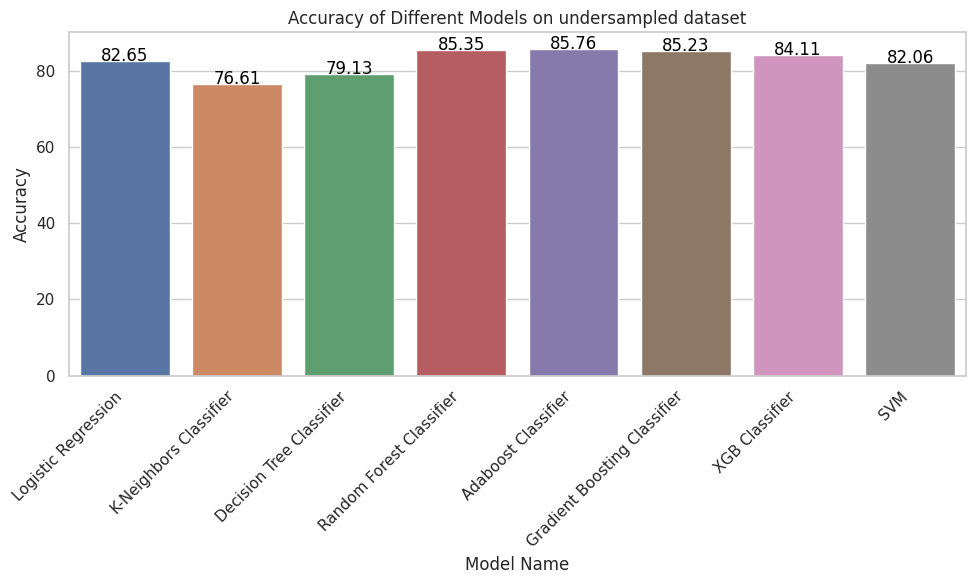

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=data)

for index, row in data.iterrows():
    plt.text(index, row['Accuracy'], round(row['Accuracy'], 2), color='black', ha="center")

plt.xticks(rotation=45, ha='right')

plt.title('Accuracy of Different Models on undersampled dataset')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

### Model training for oversampled dataset

In [51]:
predicted =[]
mod=[]
for name,algo in models.items():
    model=algo
    mod.append(name)
    model.fit(x_train_o,y_train_o)
    predict = model.predict(x_test_o)
    acc = accuracy_score(y_test_o, predict)
    predicted.append(acc*100)
    #print(name,(acc*100),"%")
    print(name,": Accuracy= ",(acc*100),"%")
    print(classification_report(y_test_o, predict))

Logistic Regression : Accuracy=  83.97673188789001 %
              precision    recall  f1-score   support

           0       0.86      0.81      0.83     16072
           1       0.82      0.87      0.85     16075

    accuracy                           0.84     32147
   macro avg       0.84      0.84      0.84     32147
weighted avg       0.84      0.84      0.84     32147

K-Neighbors Classifier : Accuracy=  93.97455439076742 %
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     16072
           1       0.93      0.95      0.94     16075

    accuracy                           0.94     32147
   macro avg       0.94      0.94      0.94     32147
weighted avg       0.94      0.94      0.94     32147

Decision Tree Classifier : Accuracy=  95.57034871061063 %
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     16072
           1       0.95      0.96      0.96     16075

    accuracy   

In [52]:
data1 = pd.DataFrame({'Model': mod, 'Accuracy': predicted})
data1

,Model,Accuracy
0,Logistic Regression,83.976732
1,K-Neighbors Classifier,93.974554
2,Decision Tree Classifier,95.570349
3,Random Forest Classifier,96.764861
4,Adaboost Classifier,93.980776
5,Gradient Boosting Classifier,91.501540
6,XGB Classifier,96.876847
7,SVM,84.160264


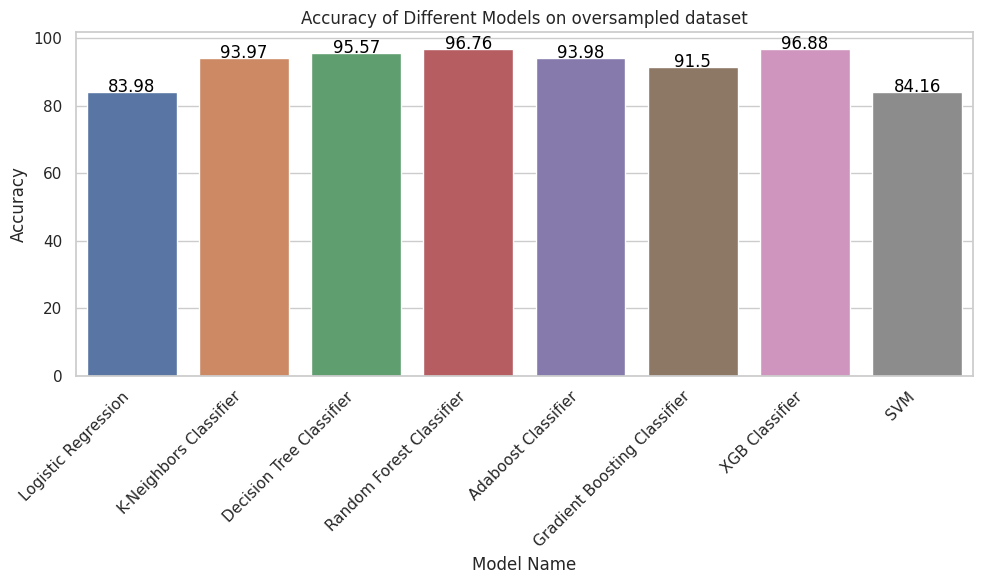

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=data1)

for index, row in data1.iterrows():
    plt.text(index, row['Accuracy'], round(row['Accuracy'], 2), color='black', ha="center")

plt.xticks(rotation=45, ha='right')

plt.title('Accuracy of Different Models on oversampled dataset')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# Plotting ROC curve for undersampled dataset

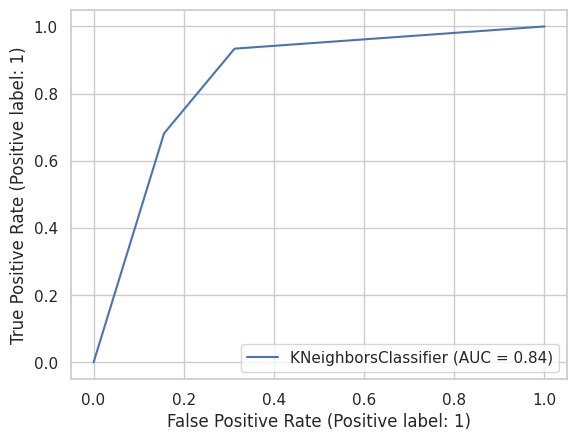

In [54]:
#kNN model has the lowest accuracy
from sklearn.metrics import RocCurveDisplay
kNN = KNeighborsClassifier(n_neighbors = 2, weights ='uniform')
kNN.fit(x_train_u,y_train_u)
ROC_kNN = RocCurveDisplay.from_estimator(kNN, x_test_u, y_test_u)

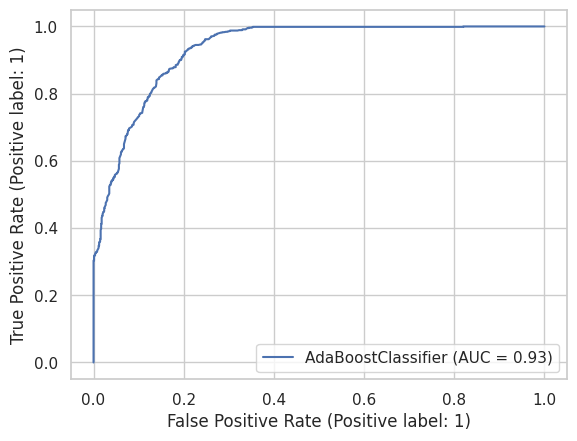

In [55]:
#AdaBoost has the highest accuracy
AdaBoost = AdaBoostClassifier()
AdaBoost.fit(x_train_u,y_train_u)
ROC_AdaBoost= RocCurveDisplay.from_estimator(AdaBoost, x_test_u, y_test_u)

# Plotting ROC curve for oversampled dataset

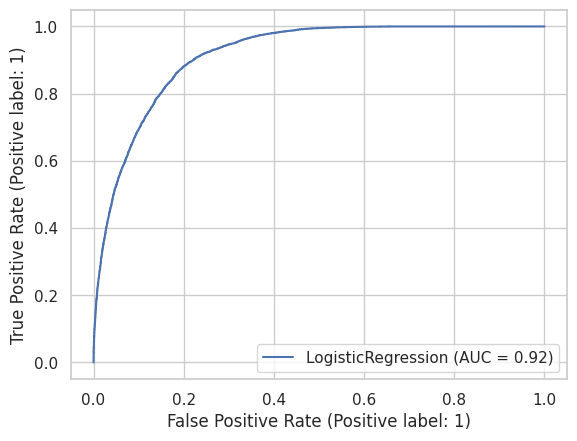

In [56]:
#Logistic regression model has the lowest accuracy
LR = LogisticRegression()
LR.fit(x_train_o,y_train_o)
ROC_LR = RocCurveDisplay.from_estimator(LR, x_test_o, y_test_o)

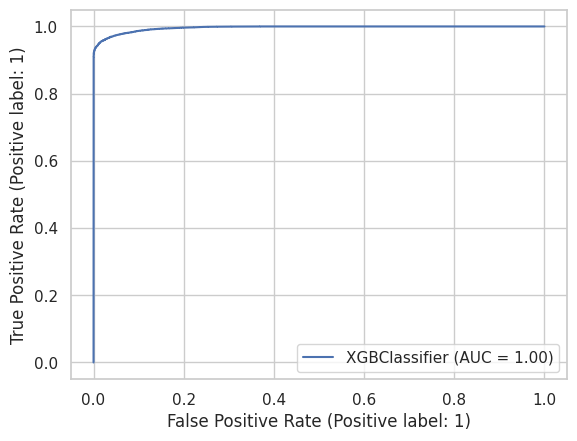

In [57]:
#XGBoost classifier model has the highest accuracy
XGB = xgb.XGBClassifier(random_state=0,booster="gbtree")
XGB.fit(x_train_o,y_train_o)
ROC_XGB = RocCurveDisplay.from_estimator(XGB, x_test_o, y_test_o)